<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


## Predictions: Regression for Car Mileage and Diamond Price


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/CarsnDiamonds.png" width="50%">


Estimated time needed: **30** minutes


<p style='color: red'>The purpose of this lab is to show you how to use a car data set to train a regression model that will predict the mileage of a car.</p>


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li><a href="#Datasets">Datasets</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Examples">Examples</a>
        <ol>
            <li><a href="#Task-1---Load-the-data-in-a-csv-file-into-a-dataframe">Task 1 - Load the data in a csv file into a dataframe</a></li>
    <li><a href="#Task-2---Identify-the-target-column-and-the-data-columns">Task 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Task-3---Build-and-Train-a-Linear-Regression-Model">Task 3 - Build and Train a Linear Regression Model</a></li>
    <li><a href="#Task-4---Evaluate-the-model-and-make-predictions">Task 4 - Evaluate the model and make predictions</a></li>        </ol>
    </li>
    


<li><a href="#Exercises">Exercises</a></li>
<ol>
    <li><a href="#Exercise-1---Loading-a-dataset-(diamond-dataset)">Exercise 1 - Loading a dataset (diamond dataset)</a></li>
    <li><a href="#Exercise-2---Identify-the-target-column-and-the-data-columns">Exercise 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Exercise-3---Build-and-Train-a-new-Linear-Regression-Model">Exercise 3 - Build and Train a new Linear Regression Model</a></li>
    <li><a href="#Exercise-4---Evaluate-the-model">Exercise 4 - Evaluate the model</a></li>
    <li><a href="#Exercise-5---Predict-the-price-of-a-diamond">Exercise 5 - Predict the price of a diamond</a></li>
    </ol>
</ol>




## Objectives

After completing this lab you will be able to:

 - Use Pandas to load data sets.
 - Identify the target and features.
 - Use Linear Regression to build a model to predict car mileage.
 - Use metrics to evaluate the model.
 - Make predictions using a trained model.


## Datasets

In this lab you will be using dataset(s):

 - Modified version of car mileage dataset. Available at https://archive.ics.uci.edu/ml/datasets/auto+mpg 
 - Modified version of diamonds dataset. Available at https://www.openml.org/search?type=data&sort=runs&id=42225&status=active
 


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [19]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
#!pip install pandas==1.3.4
#!pip install scikit-learn==1.0.2
#!pip install numpy==1.21.6
#!pip install plotly==5.14.1

In [20]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

### Importing Required Libraries


In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import plotly.express as px

## Task 1 - Load the data in a csv file into a dataframe


In [22]:
# the data set is available at the url below.
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/mpg.csv"

# using the read_csv function in the pandas library, we load the data into a dataframe.

df = pd.read_csv(URL)

Let's look at some sample rows from the dataset we loaded:


In [23]:
# show 5 random rows from the dataset
df.sample(5)

,MPG,Cylinders,Engine Disp,Horsepower,Weight,Accelerate,Year,Origin
94,16.0,6,250.0,100,3278,18.0,73,American
177,33.0,4,91.0,53,1795,17.5,75,Japanese
228,25.5,4,122.0,96,2300,15.5,77,American
229,19.0,6,225.0,100,3630,17.7,77,American
30,18.0,6,258.0,110,2962,13.5,71,American


Let's find out the number of rows and columns in the dataset:


In [24]:
df.shape

(392, 8)

Let's create a scatter plot of Horsepower versus mileage(MPG) . This will help us visualize the relationship between them.


<Axes: xlabel='Horsepower', ylabel='MPG'>

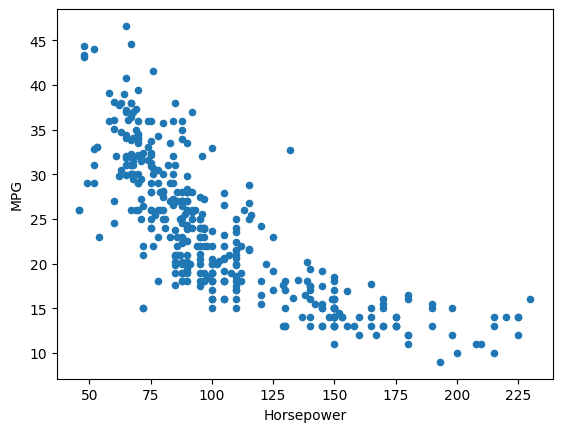

In [25]:
df.plot.scatter(x = "Horsepower", y = "MPG")
#df["Squared Horsepower"]= df["Horsepower"]**2
#df.plot.scatter(x = "Squared Horsepower", y = "MPG")
#df = df.drop('Squared Horsepower', axis=1)

You are encouraged to create more plots to visualize relationships amongst other columns


In [26]:
df["Squared Root Horsepower"]= np.sqrt(df["Horsepower"])
df["Squared Horsepower"]= df["Horsepower"]**2
df["Squared Weight"]= df["Weight"]**2
df.sample(5)

,MPG,Cylinders,Engine Disp,Horsepower,Weight,Accelerate,Year,Origin,Squared Root Horsepower,Squared Horsepower,Squared Weight
314,36.4,5,121.0,67,2950,19.9,80,European,8.185353,4489,8702500
146,24.0,4,120.0,97,2489,15.0,74,Japanese,9.848858,9409,6195121
100,14.0,8,302.0,137,4042,14.5,73,American,11.704700,18769,16337764
321,40.8,4,85.0,65,2110,19.2,80,Japanese,8.062258,4225,4452100
18,22.0,6,198.0,95,2833,15.5,70,American,9.746794,9025,8025889


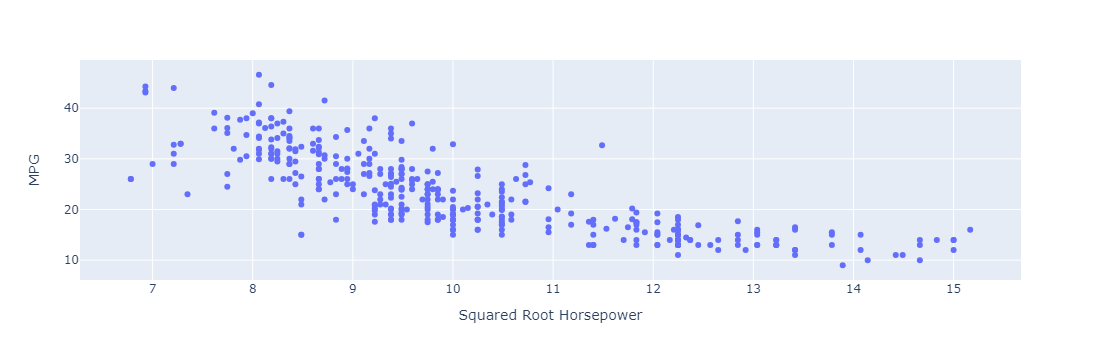

In [27]:
fig = px.scatter(df, x="Squared Root Horsepower", y= "MPG")
fig.show()

<Axes: xlabel='Weight', ylabel='MPG'>

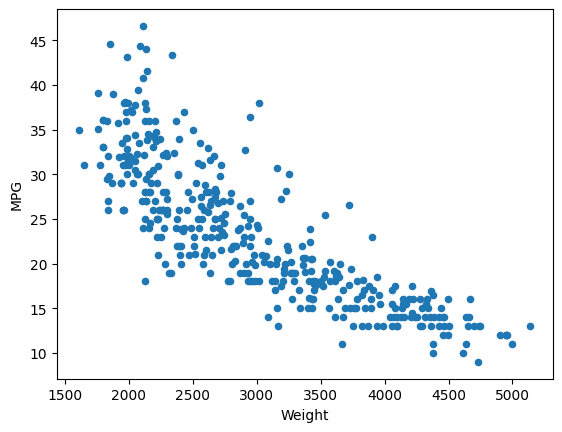

In [28]:
df.plot.scatter(x = "Weight", y = "MPG")

## Task 2 - Identify the target column and the data columns


First we identify the target. Target is the value that our machine learning model needs to predict


In [29]:
target = df["MPG"]

We identify the features next. Features are the values our machine learning model learns from


In [30]:
features = df[["Horsepower","Weight"]]
features_squared = df[["Horsepower","Squared Horsepower","Weight", "Squared Weight"]] ##bonus

## Task 3 - Build and Train a Linear Regression Model


Create a LR model


In [31]:
lr = LinearRegression()
lr_squared = LinearRegression()

Train/Fit the model


In [32]:
lr.fit(features,target)
lr_squared.fit(features_squared,target)

LinearRegression()

## Task 4 - Evaluate the model and make predictions


Your model is now trained. Time to evaluate the model.


In [33]:
#Higher the score, better the model.
# R-squared is called the coefficient of determination, and its most general definition is
# R^2 = 1 - SS_res/SS_tot
# with SS_res the residual sum of squares and SS_tot the total sum of squares.
# It is equal to 0 for the trivial model and 1 for a perfect model. 
# In some cases, as in simple linear regression, it can be expressed ad
# R^2 = SS_reg/SS_tot
# with SS_reg the explained sum of squares: in this case, R^2 is the amount
# of variance in the dependent variable that can be explained by the independent variable
print("R^2 =", lr.score(features,target), "(linear features)")
print("R^2 =",lr_squared.score(features_squared, target), "(Squared features)")

R^2 = 0.7063752737298348 (linear features)
R^2 = 0.7481197739203864 (Squared features)


In [34]:
prediction=lr.predict(features)
#plt.scatter(features.Horsepower, df["MPG"])
#plt.plot(features.Horsepower, prediction, color="red")

Make predictions. Let us predict the mileage for a car with HorsePower = 100 and Weight = 2000


In [39]:
features_squared.head()

,Horsepower,Squared Horsepower,Weight,Squared Weight
0,190,36100,3850,14822500
1,90,8100,2648,7011904
2,97,9409,2774,7695076
3,150,22500,3433,11785489
4,225,50625,3086,9523396


In [40]:
print("Predicted MPG = ",lr.predict([[100,2000]]), "(linear feature)")
print("Predicted MPG = ", lr_squared.predict([[100,10000,2000,2000000]]),"(Squared features)")

Predicted MPG =  [29.3216098] (linear feature)
Predicted MPG =  [25.83165019] (Squared features)


In [41]:
# 29.3216098 miles per gallon is the mileage of a car with HorsePower = 100 and Weight = 2000

In [42]:
prediction=lr.predict(features)
a0=lr.intercept_
a1=lr.coef_[0]
a2=lr.coef_[1]
def f(x1,x2):
    return a0+a1*x1+a2*x2

In [43]:
prediction_squared=lr_squared.predict(features_squared)
a0=lr_squared.intercept_
a1=lr_squared.coef_[0]
a2=lr_squared.coef_[1]
a3=lr_squared.coef_[2]
a4=lr_squared.coef_[3]
def g(x1,x2):
    return  a0+ a1*x1+ a2*(x1**2)+ a3*x2+ a4*(x2**2)  
features_squared.head()

,Horsepower,Squared Horsepower,Weight,Squared Weight
0,190,36100,3850,14822500
1,90,8100,2648,7011904
2,97,9409,2774,7695076
3,150,22500,3433,11785489
4,225,50625,3086,9523396


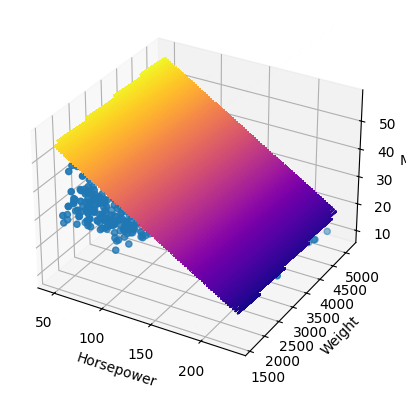

In [44]:
#plt.scatter(features.Horsepower, target, color='g')
#plt.plot(features.Horsepower, lr.predict(features),color='r')

fig = plt.figure()
x = features.Horsepower
y = features.Weight
X, Y = np.meshgrid(x, y)
Z = df["MPG"]

ax = plt.axes(projection='3d')
ax.scatter(x,y,Z)
ax.contour3D(X, Y, f(X,Y) , 100, cmap='plasma')
ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG')

#ax.view_init(elev=22, azim=70)
plt.show()


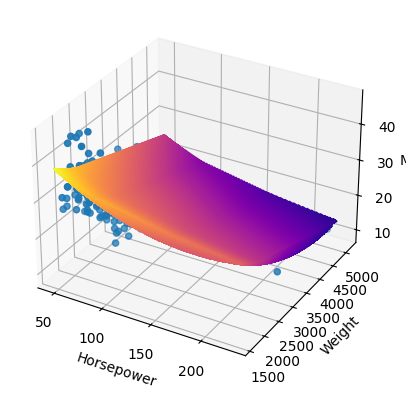

In [45]:
#plt.scatter(features.Horsepower, target, color='g')
#plt.plot(features.Horsepower, lr.predict(features),color='r')

fig = plt.figure()
x = features.Horsepower
y = features.Weight
X, Y = np.meshgrid(x, y)
Z = df["MPG"]

ax = plt.axes(projection='3d')
ax.scatter(x,y,Z)
ax.contour3D(X, Y, g(X,Y) , 200, cmap='plasma')
ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG')

#ax.view_init(elev=22, azim=70)
plt.show()


# Exercises


In [46]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/diamonds.csv"

### Exercise 1 - Loading a dataset (diamond dataset)


In [47]:
df2 = pd.read_csv(URL2)
df2.sample(5)

,s,carat,cut,color,clarity,depth,table,price,x,y,z
2392,2393,0.32,Ideal,H,VS1,61.1,56.0,561,4.44,4.46,2.72
12538,12539,1.20,Premium,E,SI2,58.2,59.0,5268,6.98,6.90,4.04
2027,2028,0.90,Fair,H,SI2,65.6,58.0,3105,6.05,5.95,3.95
21460,21461,1.63,Very Good,G,SI2,62.5,57.0,9556,7.54,7.57,4.72
9828,9829,1.01,Good,G,SI1,63.6,57.0,4672,6.37,6.33,4.04


<details>
    <summary>Click here for a Hint</summary>
    
Use the read_csv function

</details>


<details>
    <summary>Click here for Solution</summary>

```python
df2 = pd.read_csv(URL2)
```

</details>


### Exercise 2 - Identify the target column and the data columns


 - use the price column as target
 - use the columns carat and depth as features


In [48]:
target2 =  df2["price"]
features2 = df2[["carat","depth"]]

<details>
    <summary>Click here for a Hint</summary>
    
Refer to Task2
</details>


<details>
    <summary>Click here for Solution</summary>

```python
target = df2["price"]
features = df2[["carat","depth"]]
```

</details>


### Exercise 3 - Build and Train a new Linear Regression Model


Create a new Linear Regression Model


In [49]:
lr2 = LinearRegression()
lr2.fit(features2,target2)

LinearRegression()

<details>
    <summary>Click here for a Hint</summary>
    
fit using the features and target
</details>


<details>
    <summary>Click here for Solution</summary>

```python
lr2 = LinearRegression()
lr2.fit(features,target)

```

</details>


### Exercise 4 - Evaluate the model


Print the score of the model


In [50]:
#your code goes here
r2=lr2.score(features2,target2)
r2

0.8506754571636563

<details>
    <summary>Click here for a Hint</summary>
    
use the score() method
</details>


<details>
    <summary>Click here for Solution</summary>

```python
lr2.score(features,target)

```

</details>


### Exercise 5 - Predict the price of a diamond


Predict the price of a diamond with carat = 0.3 and depth = 60


In [51]:
#your code goes here
print(lr2.predict([[0.3, 60]]))

[244.95605225]


<details>
    <summary>Click here for a Hint</summary>
    
use the predict() method
</details>


<details>
    <summary>Click here for Solution</summary>

```python
lr2.predict([[0.3, 60]])

```

</details>


Congratulations! You have completed this lab.<br>
You are encouraged to experiment creating models with more than 2 feature columns


## Authors


[Ramesh Sannareddy](https://www.linkedin.com/in/rsannareddy/)


## Contributors
[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-04-14|0.1|Ramesh Sannareddy|Initial Version Created|
|2023-06-20|0.3|Vicky Kuo|Proofreading|


Copyright © 2023 IBM Corporation. All rights reserved.
